In [10]:
# Import pandas for handling tabular data
import pandas as pd

# Define the file paths
file1 = '/dns-names.l7.20231001.txt'
file2 = '/dns-names.l7.20231002.txt'

# Define column names for better readability
# These names provide context to the data:
# 'Timestamp' records the time of each event,
# 'IP_Address' holds the associated IP address,
# and 'Hostname' contains the name of the corresponding host.
columns = ['Timestamp', 'IP_Address', 'Hostname']

# Read the files into DataFrames
# Here, the file is tab-separated ('\t'), and we're assigning the column names we defined earlier.
#'header=None' tells pandas that the file does not include a header row, so all rows are treated as data.
# Similarly, read the second data file into another DataFrame using the same settings.
df1 = pd.read_csv(file1, sep='\t', names=columns, header=None)
df2 = pd.read_csv(file2, sep='\t', names=columns, header=None)

# Display the first 5 rows of data
# The `.head(5)` method fetches the first 5 rows of the DataFrame.
# Using `.to_string(index=False)` ensures that the row indices are not printed, making the output cleaner.
print("First 5 rows from dns-names.l7.20231001.txt:")
print(df1.head(5).to_string(index=False))  # Display first 5 rows without index

# Similarly, print the first 5 rows of the second dataset
print("\nFirst 5 rows from dns-names.l7.20231002.txt:")
print(df2.head(5).to_string(index=False))  # Display first 5 rows without index

First 5 rows from dns-names.l7.20231001.txt:
 Timestamp      IP_Address                                 Hostname
1696180634     209.78.58.1                       router.maximpm.com
1696180634     160.8.27.25 eth1-20--leaf1-ncg1-c3-ams3.net.sfdc.net
1696180634 107.175.205.197    107-175-205-197-host.colocrossing.com
1696180634   73.44.209.172      c-73-44-209-172.hsd1.il.comcast.net
1696180634   73.198.57.113      c-73-198-57-113.hsd1.nj.comcast.net

First 5 rows from dns-names.l7.20231002.txt:
 Timestamp     IP_Address                                             Hostname
1696267034 173.82.127.216                216-127-82-173-dedicated.multacom.com
1696267034 206.224.64.146                         undefined.hostname.localhost
1696267034 104.116.82.147 a104-116-82-147.deploy.static.akamaitechnologies.com
1696267034   76.14.196.12                        76-14-196-12.or.wavecable.com
1696267034 149.72.229.169                  wrqvzrxw.outbound-mail.sendgrid.net


# New Section

In [11]:
# Combine the two DataFrames into one
# The `pd.concat` function merges `df1` and `df2` into a single DataFrame called `data`.
# The `ignore_index=True` argument resets the index of the combined DataFrame to start from 0.
data = pd.concat([df1, df2], ignore_index=True)

# Display basic information about the dataset
# The `data.info()` function provides details about the DataFrame, including:
# Number of rows and columns
# Column names and their data types
# Count of non-null values in each column
print("Basic Information:")
print(data.info())

# Display summary statistics for numeric columns
# The `data.describe()` function generates summary statistics for numeric columns, such as:
# Count of non-missing values
# Mean, minimum, and maximum values
# Percentiles (e.g., 25%, 50%, 75%)
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values in the dataset
# The `data.isnull().sum()` function calculates the total number of missing (`NaN`) values for each column.
# This helps identify gaps in the dataset that may require cleaning.
print("\nMissing Values:")
print(data.isnull().sum())

# Check for unique values in each column
# The `data.nunique()` function counts the number of unique entries in each column.
# This provides insights into the variability of the data, such as distinct IP addresses or hostnames.
print("\nUnique Values Count:")
print(data.nunique())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4557838 entries, 0 to 4557837
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Timestamp   int64 
 1   IP_Address  object
 2   Hostname    object
dtypes: int64(1), object(2)
memory usage: 104.3+ MB
None

Summary Statistics:
          Timestamp
count  4.557838e+06
mean   1.696225e+09
std    4.320999e+04
min    1.696181e+09
25%    1.696182e+09
50%    1.696184e+09
75%    1.696269e+09
max    1.696270e+09

Missing Values:
Timestamp        0
IP_Address       0
Hostname      2731
dtype: int64

Unique Values Count:
Timestamp        6447
IP_Address    4098386
Hostname      3968801
dtype: int64


In [12]:
# Display basic information about the data
print("Basic Information:")
print(data.info())

# Display summary statistics for numeric columns
print("\nSummary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check unique values in each column
print("\nUnique Values Count:")
print(data.nunique())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4557838 entries, 0 to 4557837
Data columns (total 3 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Timestamp   int64 
 1   IP_Address  object
 2   Hostname    object
dtypes: int64(1), object(2)
memory usage: 104.3+ MB
None

Summary Statistics:
          Timestamp
count  4.557838e+06
mean   1.696225e+09
std    4.320999e+04
min    1.696181e+09
25%    1.696182e+09
50%    1.696184e+09
75%    1.696269e+09
max    1.696270e+09

Missing Values:
Timestamp        0
IP_Address       0
Hostname      2731
dtype: int64

Unique Values Count:
Timestamp        6447
IP_Address    4098386
Hostname      3968801
dtype: int64



Requests per Hour:
Hour
17    3635375
18     922463
Name: count, dtype: int64

Requests by Day of the Week:
Day
Sunday    2279083
Monday    2278755
Name: count, dtype: int64


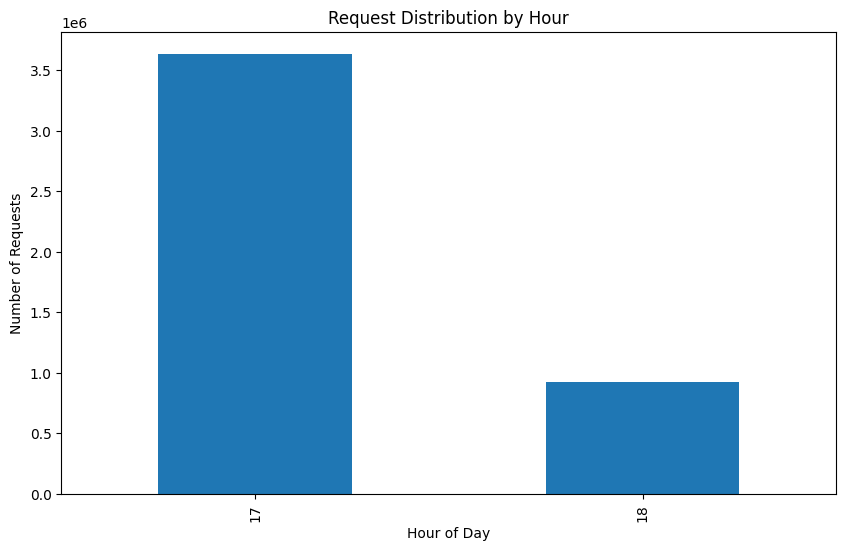

In [13]:

# Convert timestamp to a readable datetime format
# The `pd.to_datetime()` function converts the `Timestamp` column from Unix time (seconds since epoch)
# into a human-readable datetime format. The `unit='s'` argument specifies that the timestamps are in seconds.
import matplotlib.pyplot as plt
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')

# Extract date, hour, and day of the week
# The `dt` accessor allows extracting specific components from the datetime column:
# `data['Date']` stores only the date (YYYY-MM-DD).
# `data['Hour']` stores the hour of the event (0–23).
# `data['Day']` stores the name of the day (e.g., Monday, Tuesday).
data['Date'] = data['Timestamp'].dt.date
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day_name()

# Count the frequency of requests per hour
# The `value_counts()` function counts how many events occur in each hour (0–23).
# The `sort_index()` method ensures the results are ordered numerically by hour.
print("\nRequests per Hour:")
print(data['Hour'].value_counts().sort_index())

# Count the frequency of requests by day of the week
# The `value_counts()` function is used again to count the number of events for each day of the week.
# The output shows which days have more or fewer events.
print("\nRequests by Day of the Week:")
print(data['Day'].value_counts())


# Plot requests per hour
# The `plot()` function generates a bar chart showing the frequency of requests for each hour.
# - `kind='bar'` specifies a bar chart.
# - `figsize=(10, 6)` sets the chart's size.
# Titles and axis labels are added for clarity using `plt.title()`, `plt.xlabel()`, and `plt.ylabel()`.
data['Hour'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title("Request Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.show()


Top 10 IP Addresses:
IP_Address
195.39.234.226     418
202.3.19.53        245
212.214.199.168    192
62.95.64.176       191
168.146.72.230      77
77.41.147.18        74
68.233.77.168       73
123.30.20.10        68
80.196.162.1        54
188.179.4.1         54
Name: count, dtype: int64

Number of Unique IP Addresses: 4098386


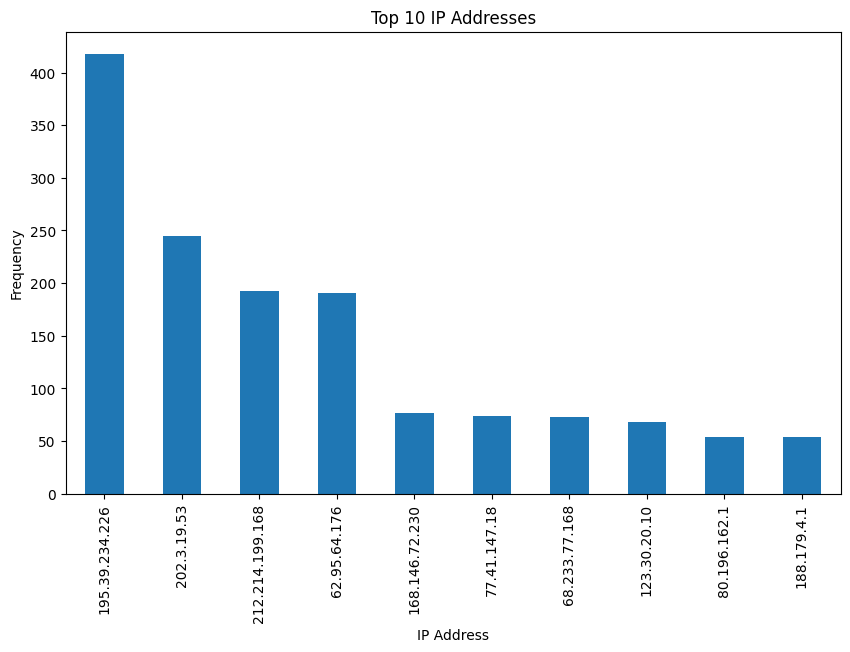

In [15]:
# Count the frequency of each IP address
# The `value_counts()` function counts how many times each IP address appears in the 'IP_Address' column.
ip_counts = data['IP_Address'].value_counts()

# Display the top 10 most common IP addresses
# The `head(10)` function fetches the 10 most frequent IP addresses from the `ip_counts` result.
print("\nTop 10 IP Addresses:")
print(ip_counts.head(10))

# Count unique IP addresses
# The `nunique()` function counts the number of unique IP addresses in the 'IP_Address' column.
unique_ips = data['IP_Address'].nunique()
print(f"\nNumber of Unique IP Addresses: {unique_ips}")

# Plot top 10 IP addresses
# A bar chart is created to visualize the frequency of the top 10 IP addresses.
# `kind='bar'` specifies the bar chart type.
# `figsize=(10, 6)` sets the dimensions of the chart.
ip_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 IP Addresses")
plt.xlabel("IP Address")
plt.ylabel("Frequency")
plt.show()

In [16]:
# Count the frequency of each hostname
# The `value_counts()` function counts how many times each hostname appears in the 'Hostname' column.
hostname_counts = data['Hostname'].value_counts()

# Display the top 10 most common hostnames
# The `head(10)` function fetches the 10 most frequent hostnames from the `hostname_counts` result.
print("\nTop 10 Hostnames:")
print(hostname_counts.head(10))  # Display the 10 most common hostnames

# Identify undefined or generic hostnames
# The `str.contains()` method checks if the string "undefined" exists in the 'Hostname' column.
# The `na=False` argument ensures that missing values are ignored during the check.
undefined_hostnames = data[data['Hostname'].str.contains(
    "undefined", na=False)]
print(f"\nNumber of Undefined Hostnames: {len(undefined_hostnames)}")


Top 10 Hostnames:
Hostname
hn.kd.ny.adsl                   33159
dynamic-ip-adsl.viettel.vn      15052
static.vnpt.vn                  13927
localhost                       12685
dynamic-adsl.viettel.vn          4959
ip4.gtt.net                      4787
adsl.viettel.vn                  3571
no-data                          3268
undefined.hostname.localhost     2070
hn.kd.dhcp                       1748
Name: count, dtype: int64

Number of Undefined Hostnames: 2146



Requests Per Date:
Date
2023-10-01    2279083
2023-10-02    2278755
dtype: int64


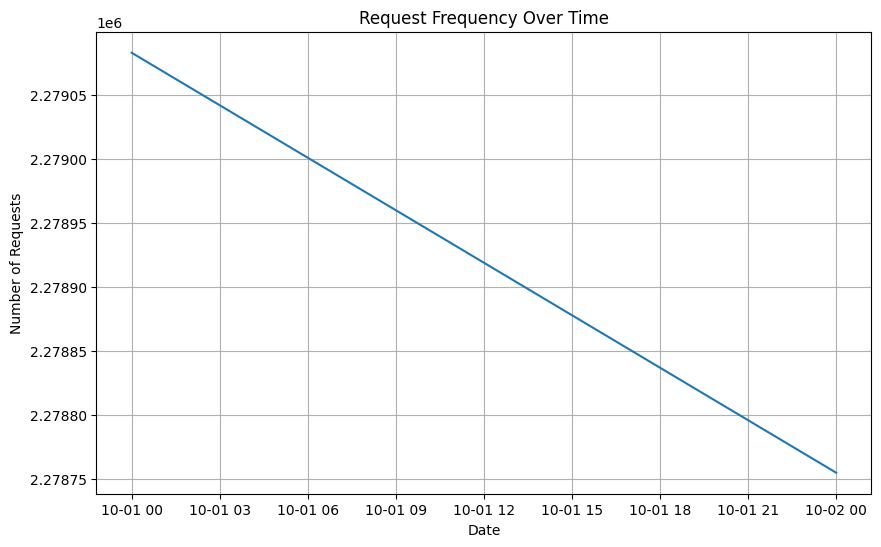

In [17]:
# Group by date and count the number of requests
# The `groupby('Date')` groups the data by the 'Date' column.
# The `size()` function calculates the total number of requests for each date.
requests_per_date = data.groupby('Date').size()

# Display the number of requests per date
# This prints the grouped request counts for each date.
print("\nRequests Per Date:")
print(requests_per_date)

# Visualize requests per date
# A line chart is created to visualize the number of requests over time.
# `kind='line'` specifies the line chart type.
# `figsize=(10, 6)` sets the dimensions of the chart.
requests_per_date.plot(kind='line', figsize=(10, 6))
plt.title("Request Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Requests")
plt.grid()
plt.show()


Top 10 TLDs:
TLD
net    1695324
com     923240
de      265264
br      149935
mx      131954
it      114546
jp      114058
cn       83056
ru       76840
nl       57115
Name: count, dtype: int64


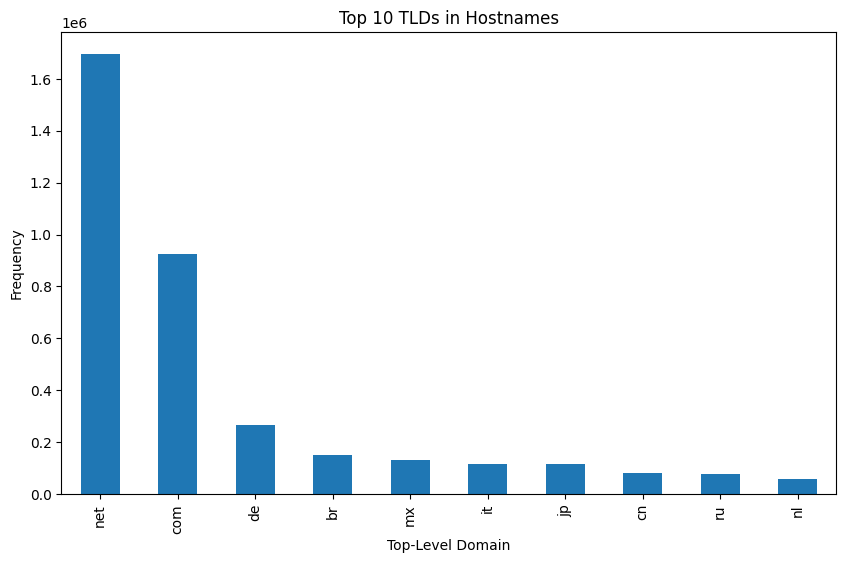

In [18]:
# Extract TLDs from hostnames
# The `str.extract()` method uses a regular expression (regex) to extract the Top-Level Domain (TLD)
# from the 'Hostname' column. The regex `r'\.([a-z]{2,})$'` matches any TLD that:
# - Starts with a dot (`.`).
# - Is followed by 2 or more lowercase letters (e.g., .com, .net).
data['TLD'] = data['Hostname'].str.extract(r'\.([a-z]{2,})$')

# Count occurrences of each TLD
# The `value_counts()` function counts how many times each TLD appears in the 'TLD' column.
tld_counts = data['TLD'].value_counts()

# Display the top 10 most common TLDs
# The `head(10)` function fetches the 10 most frequent TLDs from the `tld_counts` result
print("\nTop 10 TLDs:")
print(tld_counts.head(10))

# Visualize top TLDs
# A bar chart is created to visualize the frequency of the top 10 TLDs.
# `kind='bar'` specifies the bar chart type.
# `figsize=(10, 6)` sets the dimensions of the chart
tld_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 TLDs in Hostnames")
plt.xlabel("Top-Level Domain")
plt.ylabel("Frequency")
plt.show()


Hourly Request Trend Across Days:
Hour         17      18
Day                    
Monday  1816382  462373
Sunday  1818993  460090


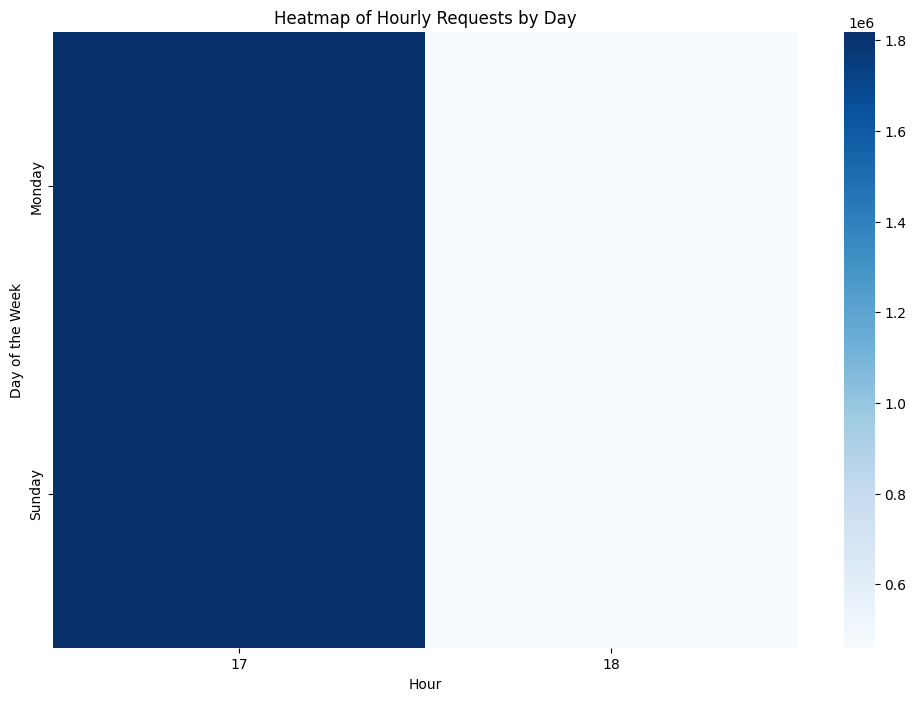

In [19]:
# Group data by day and hour
# The `groupby(['Day', 'Hour'])` groups the data by the 'Day' and 'Hour' columns.
# The `size()` function counts the number of requests for each day-hour combination.
# The `unstack()` reshapes the grouped data so that hours become columns and days remain rows.
import seaborn as sns
hourly_trend = data.groupby(['Day', 'Hour']).size().unstack()

# Display the hourly trend across days
# Prints the grouped data showing the number of requests for each hour of the day, separated by day of the week
print("\nHourly Request Trend Across Days:")
print(hourly_trend)

# Heatmap visualization of hourly trends
# The `sns.heatmap()` function is used to create a heatmap showing the frequency of requests by day and hour.
# -`cmap="Blues"` specifies the color map to use for the heatmap.
# -`annot=False` disables annotations (values) in the heatmap.
# -`cbar=True` adds a color bar to indicate the scale of the data.
plt.figure(figsize=(12, 8))
sns.heatmap(hourly_trend, cmap="Blues", annot=False, cbar=True)
plt.title("Heatmap of Hourly Requests by Day")
plt.xlabel("Hour")
plt.ylabel("Day of the Week")
plt.show()

In [20]:
# Define a threshold for common hostnames
# The threshold specifies the number of occurrences below which a hostname is considered rare.
threshold = 5  # Hostnames appearing less than or equal to 5 times
# Identify rare hostnames
# The `value_counts()` function counts how many times each hostname appears.
# The condition `<= threshold` filters hostnames that appear 5 times or fewer.
rare_hostnames = data['Hostname'].value_counts(
)[data['Hostname'].value_counts() <= threshold]

# Display rare hostnames
# This prints the rare hostnames along with their frequencies.
print("\nRare Hostnames (appear <= 5 times):")
print(rare_hostnames)

# Count the total number of rare hostnames
# The `len()` function calculates how many unique hostnames are classified as rare.
print(f"\nTotal Number of Rare Hostnames: {len(rare_hostnames)}")


Rare Hostnames (appear <= 5 times):
Hostname
bbr-d-01.de.kamp.net                         5
chi-b1-link.ip.twelve99.net                  5
ip-pool.mtcbroadband.net                     5
MARRIOTT-IN.ear2.Seattle1.Level3.net         5
c2.jump.net.uk                               5
                                            ..
206-54-193-130.dyn.grandenetworks.net        1
c-73-111-14-76.hsd1.in.comcast.net           1
v102.ce10.ams-01.nl.leaseweb.net             1
190-1-22-205.bvconline.com.ar                1
static-212-254-229-77.ipcom.comunitel.net    1
Name: count, Length: 3965280, dtype: int64

Total Number of Rare Hostnames: 3965280



Top 10 Subnets by Request Frequency:
Subnet
94.134.198    507
163.253.1     447
195.39.234    419
94.134.199    400
80.81.192     362
80.81.193     350
201.1.224     344
80.81.194     340
129.250.2     331
64.47.128     323
Name: count, dtype: int64


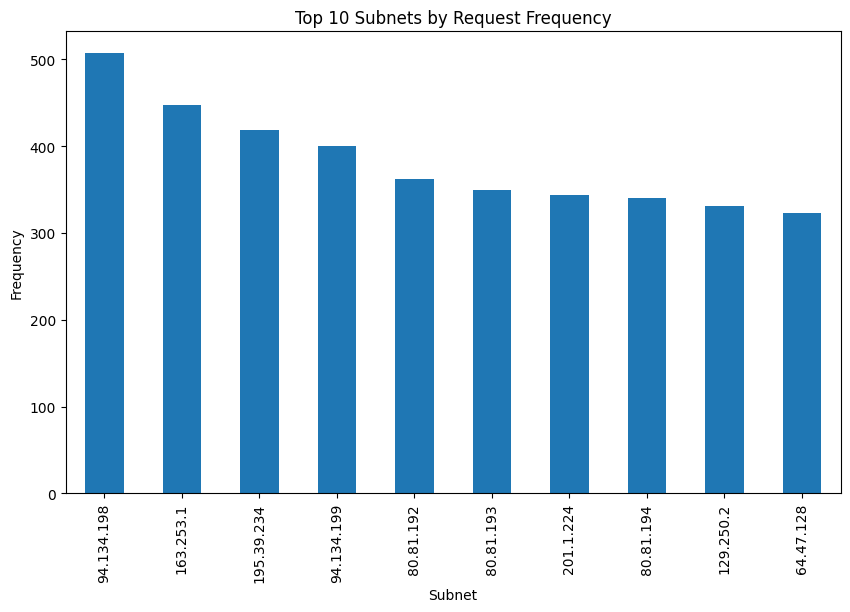

In [21]:
# Extract the first three octets (subnet) from IP addresses
# Uses `str.extract()` with regex to extract the first three octets of the IP addresses.
data['Subnet'] = data['IP_Address'].str.extract(r'^(\d+\.\d+\.\d+)')

# Count requests by subnet
# Counts how many times each subnet appears using `value_counts()`
subnet_counts = data['Subnet'].value_counts()

# Display the top 10 subnets by request frequency
# Fetches and prints the 10 most common subnets with their frequencies
print("\nTop 10 Subnets by Request Frequency:")
print(subnet_counts.head(10))

# Visualize top subnets
# Creates a bar chart to visualize the frequency of the top 10 subnets.
# - `kind='bar'` specifies the bar chart type.
# - `figsize=(10, 6)` sets the dimensions of the chart.
subnet_counts.head(10).plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Subnets by Request Frequency")
plt.xlabel("Subnet")
plt.ylabel("Frequency")
plt.show()

In [22]:
# Sort data by timestamp
# The `sort_values()` function sorts the data by the 'Timestamp' column in ascending order.
data_sorted = data.sort_values(by='Timestamp')

# Calculate time differences between consecutive requests
# The `diff()` function computes the difference between consecutive timestamps.
# The `.dt.seconds` extracts the difference in seconds
data_sorted['Time_Diff'] = data_sorted['Timestamp'].diff().dt.seconds

# Identify sessions where time difference exceeds a threshold (e.g., 30 minutes)
# The session threshold is set to 30 minutes, converted to seconds (30 * 60 = 1800 seconds)
# A new session is identified if the time difference exceeds the threshold.
session_threshold = 30 * 60  # 30 minutes in seconds
data_sorted['New_Session'] = data_sorted['Time_Diff'] > session_threshold

# Count total sessions
# Add 1 for the first session
# The total number of sessions is calculated by summing the 'New_Session' column (True values count as 1)
total_sessions = data_sorted['New_Session'].sum() + 1
print(f"\nTotal Number of Sessions Identified: {total_sessions}")


Total Number of Sessions Identified: 2
